## Using Keras to Build and Train Neural Networks

In this assignment you will use a neural network to predict diabetes using the Pima Diabetes Dataset.  You will use the Keras package to quickly build and train a neural network and compare the performance. 


## UCI Pima Diabetes Dataset

* UCI ML Repositiory (http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes)

### Attributes: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

The UCI Pima Diabetes Dataset which has 8 numerical predictors and a binary outcome.

## Questions

### Part 1: Build a Baseline Model

Use the Sequential model to quickly build a baseline neural network with one single hidden layer with 12 nodes.\

1 Read and load data into Python \
2 Explore and pre-process the dataset \
3 Split the data to training and testing dataset (75%, 25%)\
4 Build the baseline model and find how many parameters does your model have?\
5 Train you model with 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128\
6 Graph the trajectory of the loss functions, accuracy on both train and test set.\
7 Evaluate and interpret the accuracy and loss performance during training, and testing. 

### Part 2: Find the Best Model

Now  try four different models and see if you can improve the accuracy by focusing on different network structures (i.e, activation functions, optimization algorithms, batch sizes, number of epochs, ...), affecting the performance, training time, and level of overfitting (or underfitting).

8. For all your models, plot the ROC curve for the predictions.
9. Which model has best performance, why?
10. Save your best model weights into a binary file.


Submit two files: the Jupyter notebook with your code and answers and its print out PDF.


In [41]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [6]:
from scikitplot.metrics import plot_roc_curve

In [7]:
 pip install scikit-plot

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# load the dataset
data = pd.read_csv('pima-indians-diabetes.csv')

In [10]:
print(data.head())

   6  148  72  35    0  33.6  0.627  50  1
0  1   85  66  29    0  26.6  0.351  31  0
1  8  183  64   0    0  23.3  0.672  32  1
2  1   89  66  23   94  28.1  0.167  21  0
3  0  137  40  35  168  43.1  2.288  33  1
4  5  116  74   0    0  25.6  0.201  30  0


In [11]:
data.columns=['Pregnant','Glucose','BloodPressure','SkinThickness','Insulin','Bmi','Dia Pedigree','Age','Class']

In [12]:
data['Insulin']=data['Insulin'].fillna(data['Insulin'].median())
data['SkinThickness']=data['SkinThickness'].fillna(data['SkinThickness'].median())
data['Glucose']=data['Glucose'].fillna(data['Glucose'].mean())
data['Bmi']=data['Bmi'].fillna(data['Bmi'].mean())
data['BloodPressure']=data['BloodPressure'].fillna(data['BloodPressure'].mean())

In [13]:

dataset = data.values
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

In [14]:
# First - split into Train/Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [15]:
X_train.shape,y_train.shape,X_test.shape

((575, 8), (575,), (192, 8))

In [16]:
# define the keras model
model1 = Sequential()
model1.add(Dense(12, input_dim=8, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [17]:
model1.count_params()

221

In [18]:
model1.compile(loss='binary_crossentropy',   
             optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
             metrics=['accuracy'])

In [19]:
history = model1.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=20,
                    batch_size=128,
                    verbose=0)

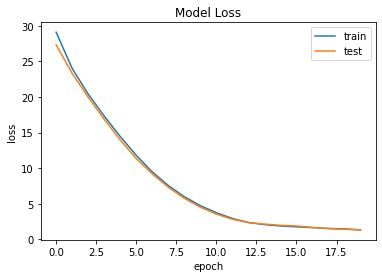

In [20]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [53]:
scores1 = model1.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))

6/6 [==============================] - 0s 2ms/step - loss: 1.3300 - accuracy: 0.4740
accuracy: 33.13%


In [52]:
scores1 = model1.evaluate(X_train, y_train)
print("%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))

18/18 [==============================] - 0s 1ms/step - loss: 1.2581 - accuracy: 0.5183
accuracy: 33.13%


Model 2


In [23]:
model2 = Sequential()
model2.add(Dense(50, input_dim=8, activation='relu'))
model2.add(Dense(20, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',   
             optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
             metrics=['accuracy'])

In [24]:
history = model2.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=128,
                    verbose=0)

In [54]:
scores2 = model2.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))
scores = model2.evaluate(X_train, y_train)
print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))

6/6 [==============================] - 0s 2ms/step - loss: 0.5918 - accuracy: 0.6719
accuracy: 33.13%
18/18 [==============================] - 0s 1ms/step - loss: 0.6039 - accuracy: 0.6696
accuracy: 66.96%


Model 3

In [26]:
model3 = Sequential()
model3.add(Dense(500, input_dim=8, activation='tanh'))
model3.add(Dense(8, activation='tanh'))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(loss='mean_squared_error',   
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=['accuracy'])

In [27]:
history = model3.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=128,
                    verbose=0)

In [55]:
scores3 = model3.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model3.metrics_names[1], scores[1]*100))
scores = model3.evaluate(X_train, y_train)
print("%s: %.2f%%" % (model3.metrics_names[1], scores[1]*100))

6/6 [==============================] - 0s 2ms/step - loss: 0.1752 - accuracy: 0.7292
accuracy: 66.96%
18/18 [==============================] - 0s 1ms/step - loss: 0.1356 - accuracy: 0.8278
accuracy: 82.78%


Model 4

In [31]:
model4 = Sequential()
model4.add(Dense(1000, input_dim=8, activation='tanh'))
model4.add(Dense(32, activation='tanh'))
model4.add(Dense(1, activation='sigmoid'))

model4.compile(loss='mean_squared_error',   
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=['accuracy'])

In [32]:
history = model4.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=128,
                    verbose=0)

In [56]:
scores4 = model4.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model4.metrics_names[1], scores[1]*100))
scores = model4.evaluate(X_train, y_train)
print("%s: %.2f%%" % (model4.metrics_names[1], scores[1]*100))

6/6 [==============================] - 0s 3ms/step - loss: 0.1743 - accuracy: 0.7344
accuracy: 82.78%
18/18 [==============================] - 0s 1ms/step - loss: 0.1173 - accuracy: 0.8504
accuracy: 85.04%


In [59]:
model5 = Sequential()
model5.add(Dense(1000, input_dim=8, activation='tanh'))
model5.add(Dense(32, activation='tanh'))
model5.add(Dense(1, activation='sigmoid'))

model5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse',
              metrics=['accuracy'])

              

In [60]:
history = model5.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=128,
                    verbose=0)

In [61]:
scores5 = model5.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model5.metrics_names[1], scores[1]*100))
scores = model5.evaluate(X_train, y_train)
print("%s: %.2f%%" % (model5.metrics_names[1], scores[1]*100))

6/6 [==============================] - 0s 2ms/step - loss: 0.1662 - accuracy: 0.7552
accuracy: 33.13%
18/18 [==============================] - 0s 1ms/step - loss: 0.1007 - accuracy: 0.8730
accuracy: 87.30%


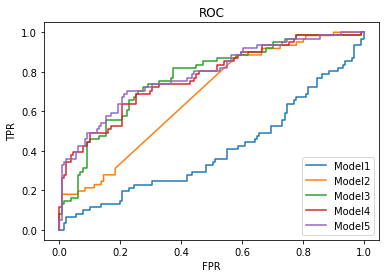

In [40]:
y_pred_prob1=model1.predict(X_test)
fpr1 , tpr1, thresholds1=roc_curve(y_test, y_pred_prob1)

y_pred_prob2=model2.predict(X_test)
fpr2 , tpr2, thresholds2= roc_curve(y_test, y_pred_prob2)

y_pred_prob3=model3.predict(X_test)
fpr3 , tpr3, thresholds3= roc_curve(y_test, y_pred_prob3)

y_pred_prob4=model4.predict(X_test)
fpr4 , tpr4, thresholds4= roc_curve(y_test, y_pred_prob4)

y_pred_prob5=model5.predict(X_test)
fpr5 , tpr5, thresholds5= roc_curve(y_test, y_pred_prob5)

plt.plot(fpr1,tpr1,label="Model1")
plt.plot(fpr2,tpr2,label="Model2")
plt.plot(fpr3,tpr3,label="Model3")
plt.plot(fpr4,tpr4,label="Model4")
plt.plot(fpr5,tpr5,label="Model5")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.show()

In [42]:
auc1=roc_auc_score(y_test,y_pred_prob1)
auc2=roc_auc_score(y_test,y_pred_prob2)
auc3=roc_auc_score(y_test,y_pred_prob3)
auc4=roc_auc_score(y_test,y_pred_prob4)
auc5=roc_auc_score(y_test,y_pred_prob5)

In [62]:
final=[['Model1',auc1,scores1[1]], ['Model2',auc2,scores2[1]], ['Model3',auc3,scores3[1]],
        ['Model4',auc4,scores4[1]], ['Model5',auc5,scores5[1]]]
auc_final=pd.DataFrame(final, columns=['Model', 'Auc','Accuracy'])
sorted_final=auc_final.sort_values(["Auc"],ascending=False)
sorted_final

,Model,Auc,Accuracy
4,Model5,0.784508,0.755208
3,Model4,0.769866,0.734375
2,Model3,0.769115,0.729167
1,Model2,0.673195,0.671875
0,Model1,0.400701,0.473958


In [63]:
model5.save('Best Model.h5')

Best Model is model 5